# Testing the search-and-rescue model

This notebook demonstrates Python code for classify images using your trained Visual Recognition model.


- Step 1: Install and import required libraries
- Step 2: Look up Visual Recognition API key and trained model id
- Step 3: View test images
- Step 4: Classify the test images

## Step 1: Install and import required libraries

- watson_developer_cloud for working with [Watson Visual Recognition API](https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/python.html?python)

In [ ]:
!pip install --upgrade watson-developer-cloud

## Step 2: Look up Visual Recognition API key and trained model id

1. From the *Services* menu in Watson Studio right-click "Watson Services" and then open the link in a new browser tab
2. In the new Watson services tab, click the service instance in the Visual Recognition list
3. In the "Overview" tab, scroll down to the list of your custom models and then click "Copy model ID"
4. In the "Credentials" tab, expand credentials and then copy the apikey

Here is a video demonstrating how to do this: [Looking up a model id](https://youtu.be/5Ls--p5EL3g)

In [ ]:
model_id = '' # <-- PASTE YOUR MODEL ID HERE
apikey   = '' # <-- PASTE YOUR APIKEY HERE

## Step 3: View test images

Sample images of objects for testing your trained model.

In [11]:
url_1 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/ball.jpg'
url_2 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/blocks.jpg'
url_3 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/horse.jpg'
url_4 = 'https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/wheelbarrow.jpg'

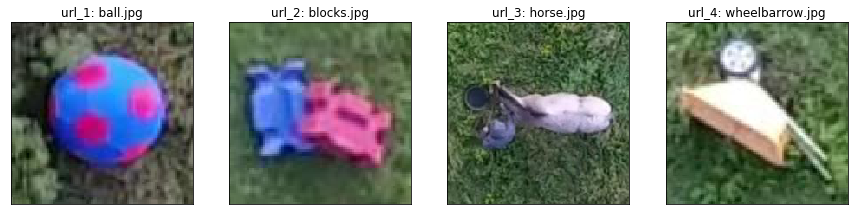

In [12]:
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 1, 4, figsize=( 15, 60 ) )
axs[0].imshow( io.imread(url_1) )
axs[1].imshow( io.imread(url_2) )
axs[2].imshow( io.imread(url_3) )
axs[3].imshow( io.imread(url_4) )
axs[0].set_title( 'url_1: ' + re.sub( '.*\/', '', url_1 ) )
axs[1].set_title( 'url_2: ' + re.sub( '.*\/', '', url_2 ) )
axs[2].set_title( 'url_3: ' + re.sub( '.*\/', '', url_3 ) )
axs[3].set_title( 'url_4: ' + re.sub( '.*\/', '', url_4 ) )
for img in axs:
    img.set_xticks([])
    img.set_yticks([])

## Step 4: Classify the test images

In [10]:
# Instantiate a visual recognition object
#
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

In [16]:
# Classify the test spectrograms
#
# *Change the url parameter (url_2, url_3, url_4) to test the different sample spectrograms
#
import json
results = visual_recognition.classify( url=url_4, threshold='0', classifier_ids=model_id ).get_result()
print( json.dumps( results, indent=2 ) )

{
  "custom_classes": 4,
  "images_processed": 1,
  "images": [
    {
      "classifiers": [
        {
          "name": "search-and-rescue",
          "classes": [
            {
              "score": 0.23,
              "class": "blocks"
            },
            {
              "score": 0.005,
              "class": "car"
            },
            {
              "score": 0.013,
              "class": "horse"
            },
            {
              "score": 0.73,
              "class": "wheelbarrow"
            }
          ],
          "classifier_id": "searchxandxrescue_700952328"
        }
      ],
      "source_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/wheelbarrow.jpg",
      "resolved_url": "https://raw.githubusercontent.com/spackows/CASCON-2018_Analyzing_images/master/search-and-rescue/test-data/wheelbarrow.jpg"
    }
  ]
}


Copyright © 2018 IBM. This notebook and its source code are released under the terms of the MIT License.